subplots
https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html#plt.subplot:-Simple-Grids-of-Subplots

<IPython.core.display.Javascript object>


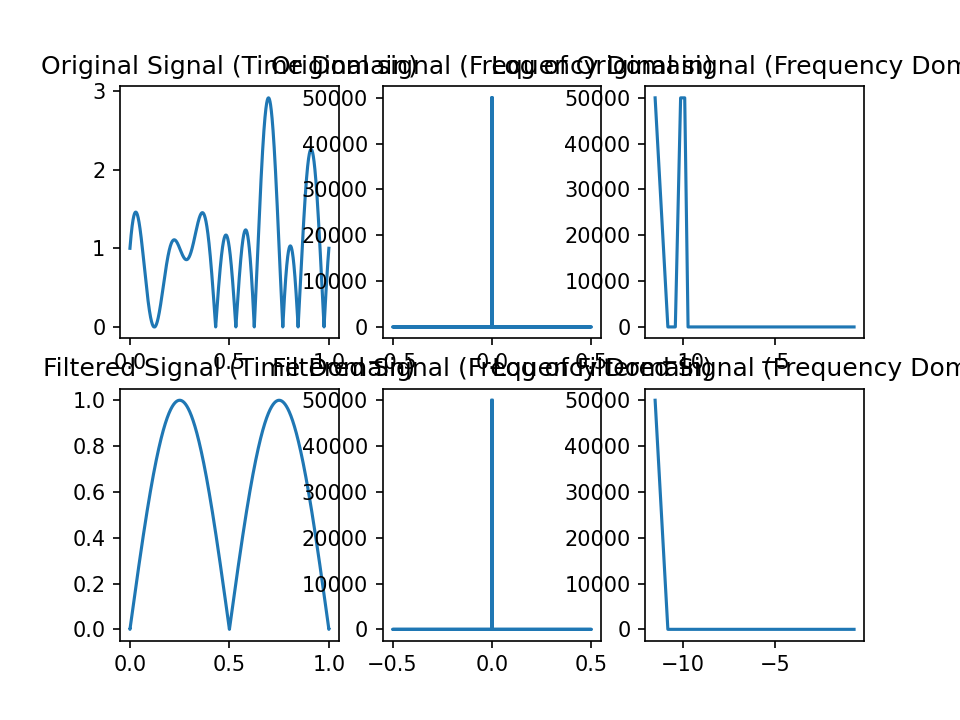

/tmp/ipykernel_500/3219906311.py:28: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(freq), np.abs(fft_signal)) # abs gets magnitude of the complex vector
/tmp/ipykernel_500/3219906311.py:28: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(freq), np.abs(fft_signal)) # abs gets magnitude of the complex vector
/tmp/ipykernel_500/3219906311.py:75: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(freq), np.abs(filtered_fft)) # abs gets magnitude of the complex vector
/tmp/ipykernel_500/3219906311.py:75: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(freq), np.abs(filtered_fft)) # abs gets magnitude of the complex vector


In [57]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

# Generate a test signal with high-frequency noise
samples = 100000
t = np.linspace(0, 1, samples) # 0 to 1 second, 10,000 samples per second
signal = np.sin(1*(2*np.pi)*t) + np.sin(4*(2*np.pi)*t) + np.cos(5*(2*np.pi)*t) # k = 3, 1500, 4000


# Plot the original signal in the time domain
plt.subplot(2, 3, 1)
plt.plot(t, np.abs(signal))
plt.title('Original Signal (Time Domain)')

# Perform the Fourier transform to convert the signal to the frequency domain
freq = np.fft.fftfreq(len(t))
fft_signal = np.fft.fft(signal)

# Plot the signal in the frequency domain
plt.subplot(2, 3, 2)
plt.plot(freq, np.abs(fft_signal)) # abs gets magnitude of the complex vector
plt.title('Original signal (Frequency Domain)')

# Plot the log of the frequency domain
plt.subplot(2, 3, 3)
plt.plot(np.log(freq), np.abs(fft_signal)) # abs gets magnitude of the complex vector
plt.title('Log of Original signal (Frequency Domain)')


# Create a high-frequency filter that removes all frequencies above 50 Hz
# Recall, 1 Hz equals 1 cycle persecond and we are doing a rate of 1000 samples per second.
#
# filter out the freqs we do not want in the final output
k1_filter = 4
k2_filter = 5
freq_remove1 = (k1_filter/samples) # normalize about [-0.5, 0.5]
freq_remove2 = (k2_filter/samples) 
err_range = 0.000005 # plus or minus


freq_remove1_cutoff = np.ones_like(freq)
freq_remove2_cutoff = np.ones_like(freq)


# remove the following frequencies plus or minus a certain error range 
freq_remove1_cutoff[np.logical_and(np.abs(freq) > freq_remove1 - err_range, np.abs(freq) < freq_remove1 + err_range)] = 0
freq_remove2_cutoff[np.logical_and(np.abs(freq) > freq_remove2 - err_range, np.abs(freq) < freq_remove2 + err_range)] = 0

# zeros out the freq we want to remove
full_freq_filter = np.logical_and(freq_remove1_cutoff, freq_remove2_cutoff)


# Apply the filter to the Fourier transformed signal
filtered_fft = fft_signal * full_freq_filter


# Perform an inverse Fourier transform to convert the signal back to the time domain
filtered_signal = np.fft.ifft(filtered_fft)


# Plot the filtered signal in the time domain
plt.subplot(2, 3, 4)
plt.plot(t, np.abs(filtered_signal))
plt.title('Filtered Signal (Time Domain)')

# Plot the filtered signal in the frequency domain
plt.subplot(2, 3, 5)
plt.plot(freq, np.abs(filtered_fft))
plt.title('Filtered Signal (Frequency Domain)')

# Plot the log of the frequency domain
plt.subplot(2, 3, 6)
plt.plot(np.log(freq), np.abs(filtered_fft)) # abs gets magnitude of the complex vector
plt.title('Log of Filtered Signal (Frequency Domain)')

plt.show()


In [44]:
np.set_printoptions(threshold=np.inf, linewidth=100)
fft_signal

array([ 1.00000000e+00+0.00000000e+00j,  1.04186763e+00-6.67194989e-01j,
        4.33186690e+00-4.99974986e+03j,  1.56119479e+00+1.19888367e+00j,
        2.77595456e+00+6.66399598e-01j,  5.00024105e+03+8.32578967e+00j,
       -2.27490640e+00+3.64958718e-01j, -1.04275817e+00+3.02087762e-01j,
       -6.41884230e-01+2.57349983e-01j, -4.47191796e-01+2.23827082e-01j,
       -3.34044242e-01+1.97638989e-01j, -2.61093367e-01+1.76517528e-01j,
       -2.10735493e-01+1.59050705e-01j, -1.74242218e-01+1.44311993e-01j,
       -1.46812399e-01+1.31666927e-01j, -1.25597683e-01+1.20665625e-01j,
       -1.08807861e-01+1.10979725e-01j, -9.52653062e-02+1.02363659e-01j,
       -8.41661805e-02+9.46299189e-02j, -7.49447249e-02+8.76327407e-02j,
       -6.71923284e-02+8.12570264e-02j, -6.06072867e-02+7.54106322e-02j,
       -5.49625303e-02+7.00188854e-02j, -5.00842776e-02+6.50206081e-02j,
       -4.58375498e-02+6.03651848e-02j, -4.21161190e-02+5.60103659e-02j,
       -3.88353929e-02+5.19205997e-02j, -3.59272890